### PHASE 2 CODE

In [24]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Reading the csv file and store it in a dataframe
df = pd.read_csv("cardekho_imputated.csv")
df

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [26]:
# To drop the unnamed column
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [27]:
# Checking for null values
df.isnull().sum()

car_name             0
brand                0
model                0
min_cost_price       0
max_cost_price       0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [28]:
# Cheking the data type and other information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   min_cost_price     15411 non-null  float64
 4   max_cost_price     15411 non-null  float64
 5   vehicle_age        15411 non-null  int64  
 6   km_driven          15411 non-null  int64  
 7   seller_type        15411 non-null  object 
 8   fuel_type          15411 non-null  object 
 9   transmission_type  15411 non-null  object 
 10  mileage            15411 non-null  float64
 11  engine             15411 non-null  int64  
 12  max_power          15411 non-null  float64
 13  seats              15411 non-null  int64  
 14  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.8+ MB


In [29]:
# Since the car_name column is redundant it is best to drop it
df = df.drop(['car_name'], axis=1)
# We are taking the average of the min and max cost price and dropping the min and max cost prices
df['avg_cost_price'] = (df['min_cost_price'] + df['max_cost_price'])/2


df = df.drop(['min_cost_price'], axis=1)
df = df.drop(['max_cost_price'], axis=1)
df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,4.112027e+05
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,7.295000e+05
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.081004e+06
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,4.112027e+05
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,1.196500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000,7.138267e+05
15407,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000,1.038372e+06
15408,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000,1.228092e+06
15409,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000,2.137000e+06


In [30]:
# Converting the average cost price and selling price to int 
df['avg_cost_price'] = df['avg_cost_price'].astype(int)
df['mileage'] = df['mileage'].astype(int)
df['max_power'] = df['max_power'].astype(int)


In [31]:
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19,796,46,5,120000,411202
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18,1197,82,5,550000,729500
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17,1197,80,5,215000,1081004
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20,998,67,5,226000,411202
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22,1498,98,5,570000,1196500


In [32]:
# Generating descriptive statistics for the numeric columns
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,avg_cost_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04,1.541100e+04
mean,6.036338,5.561648e+04,19.250535,1486.057751,100.245020,5.325482,7.749711e+05,3.927797e+06
std,3.013291,5.161855e+04,4.192262,521.106696,42.980942,0.807628,8.941284e+05,2.887397e+07
min,0.000000,1.000000e+02,4.000000,793.000000,38.000000,0.000000,4.000000e+04,3.810000e+05
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05,7.520000e+05
50%,6.000000,5.000000e+04,19.000000,1248.000000,88.000000,5.000000,5.560000e+05,1.038372e+06
75%,8.000000,7.000000e+04,22.000000,1582.000000,117.000000,5.000000,8.250000e+05,1.545500e+06
max,29.000000,3.800000e+06,33.000000,6592.000000,626.000000,9.000000,3.950000e+07,4.993500e+08


In [33]:
# Storing a copy of dataframe df in df1
df1 = df.copy()

In [34]:
# Generating descriptive statistics for the categorical columns
df.describe(include=['O'])

,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411
unique,32,120,3,5,2
top,Maruti,i20,Dealer,Petrol,Manual
freq,4992,906,9539,7643,12225


In [35]:
# For some of the categorical columns we will find the unique values for better analysis

In [36]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [37]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [38]:
df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [39]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [40]:
# Making a dataframe for categorical columns 
df2 = df[['seller_type','transmission_type', 'fuel_type', 'brand']]
df2.head()

,seller_type,transmission_type,fuel_type,brand
0,Individual,Manual,Petrol,Maruti
1,Individual,Manual,Petrol,Hyundai
2,Individual,Manual,Petrol,Hyundai
3,Individual,Manual,Petrol,Maruti
4,Dealer,Manual,Diesel,Ford


In [41]:
# Making a dataframe for continuous numerical columns
df3 = df[['vehicle_age','km_driven','mileage','engine','max_power','selling_price','avg_cost_price','seats']]
df3.head()

,vehicle_age,km_driven,mileage,engine,max_power,selling_price,avg_cost_price,seats
0,9,120000,19,796,46,120000,411202,5
1,5,20000,18,1197,82,550000,729500,5
2,11,60000,17,1197,80,215000,1081004,5
3,9,37000,20,998,67,226000,411202,5
4,6,30000,22,1498,98,570000,1196500,5


#### Exploratory Data Analysis

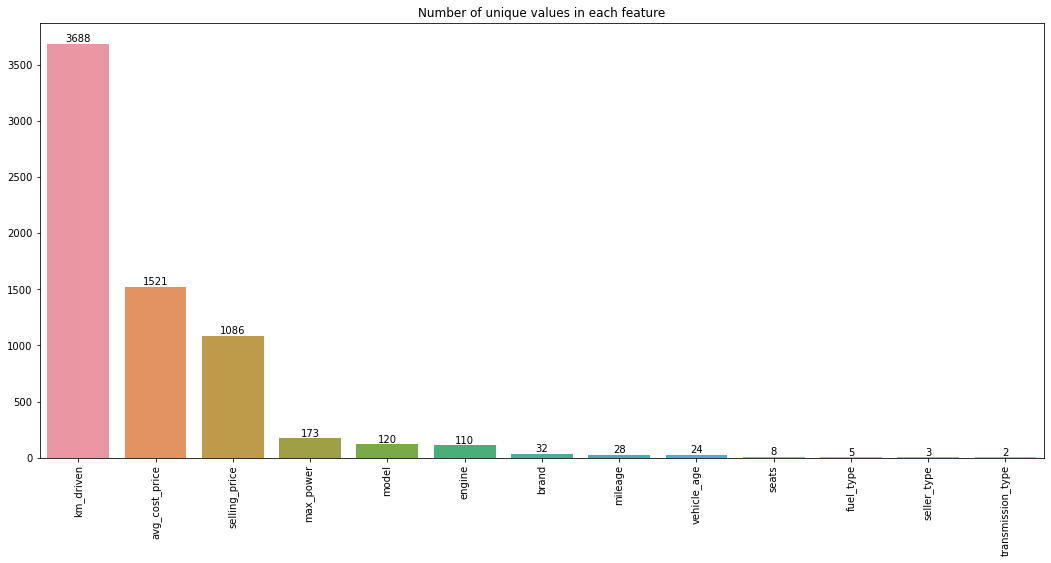

In [42]:
# Counting the total number of unique values in each column
x1 = df.nunique().sort_values(ascending=False).index
y1 = df.nunique().sort_values(ascending=False).values

fig = plt.figure(figsize = (18, 8))
ax = sns.barplot(x=x1, y=y1)
ax.bar_label(ax.containers[0])

plt.xticks(rotation = 90)
plt.title('Number of unique values in each feature')
plt.show()

###### Univariate analysis

In [43]:
# First we will perform univariate analysis of the categorical variables

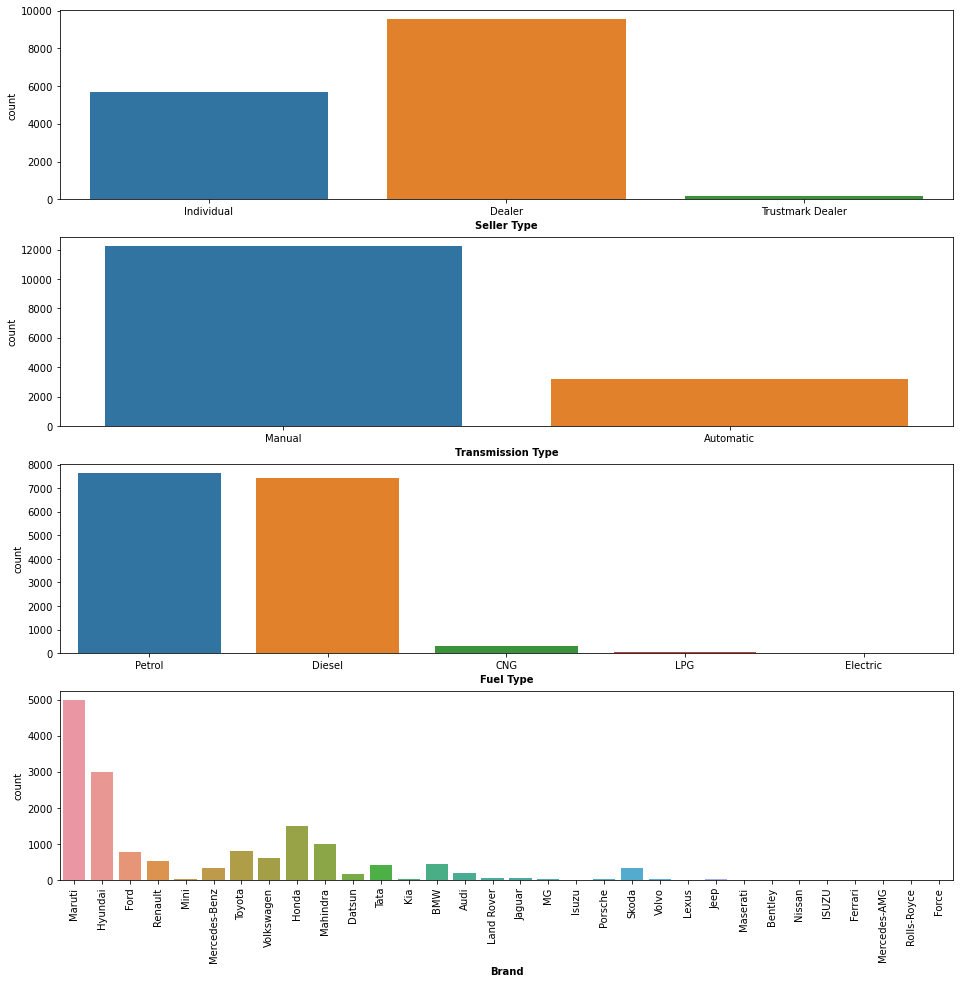

In [44]:
# Countplot of the categorical features
fig = plt.figure(figsize=(16,16))
gs = fig.add_gridspec(4,1)

#Row 1
ax00 = fig.add_subplot(gs[0,0])
ax00_s = sns.countplot(x = df2['seller_type'])
ax00_s.set_xlabel(xlabel='Seller Type', fontsize=10, weight='bold')


#Row 2
ax10 = fig.add_subplot(gs[1,0])
ax10_s = sns.countplot(x = df2['transmission_type'])
ax10_s.set_xlabel(xlabel='Transmission Type', fontsize=10, weight='bold')

# Row 3
ax20 = fig.add_subplot(gs[2,0])
ax20_s = sns.countplot(x = df2['fuel_type'])
ax20_s.set_xlabel(xlabel='Fuel Type', fontsize=10, weight='bold')


# Row 4
ax30 = fig.add_subplot(gs[3,0])
ax30_s = sns.countplot(x = df2['brand'])
ax30_s.set_xlabel(xlabel='Brand', fontsize=10, weight='bold')

plt.xticks(rotation = 90)

plt.show()

In [45]:
# Since some brand of cars have very less sales it will be better if we split the data into top 10 
# and bottom 10 selling by brand

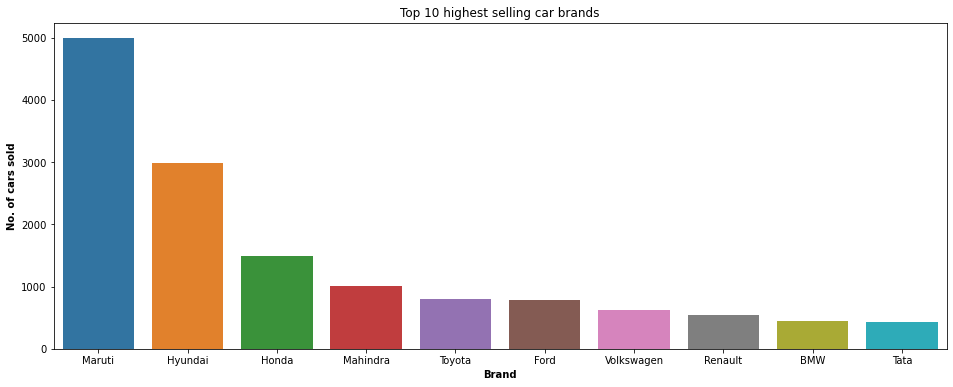

In [46]:
# Top 10 highest selling car brands
fig = plt.figure(figsize=(16,6))


top_cars = df['brand'].value_counts().head(10)
sns.barplot(x=top_cars.index, y=top_cars.values)
plt.title('Top 10 highest selling car brands')

plt.xlabel("Brand", fontsize=10, weight='bold')
plt.ylabel("No. of cars sold", fontsize=10, weight='bold')

plt.show()

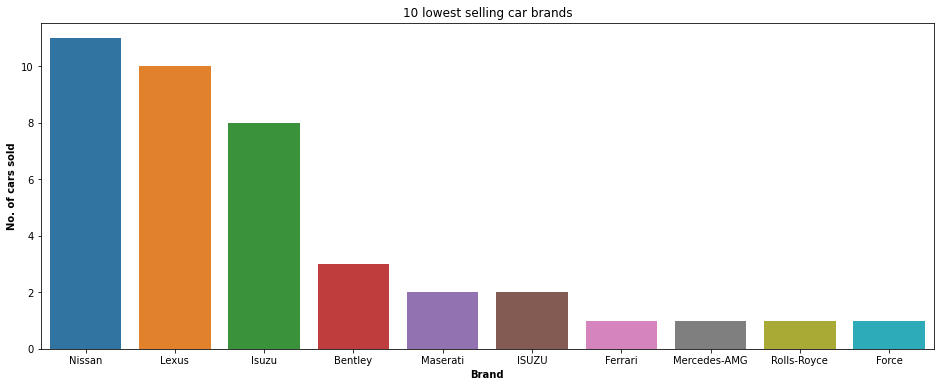

In [47]:
# 10 lowest selling car brands
fig = plt.figure(figsize=(16,6))

ls_cars = df['brand'].value_counts().tail(10) 
sns.barplot(x=ls_cars.index, y=ls_cars.values)

plt.title('10 lowest selling car brands')

plt.xlabel("Brand", fontsize=10, weight='bold')
plt.ylabel("No. of cars sold", fontsize=10, weight='bold')

plt.show()

In [48]:
# Univariate analysis of the numerical columns
# Striplot helps to visualize the distribution of data points of numerical features.
# KDE plot represents the data using a continuous probability density curve in one or more dimensions.

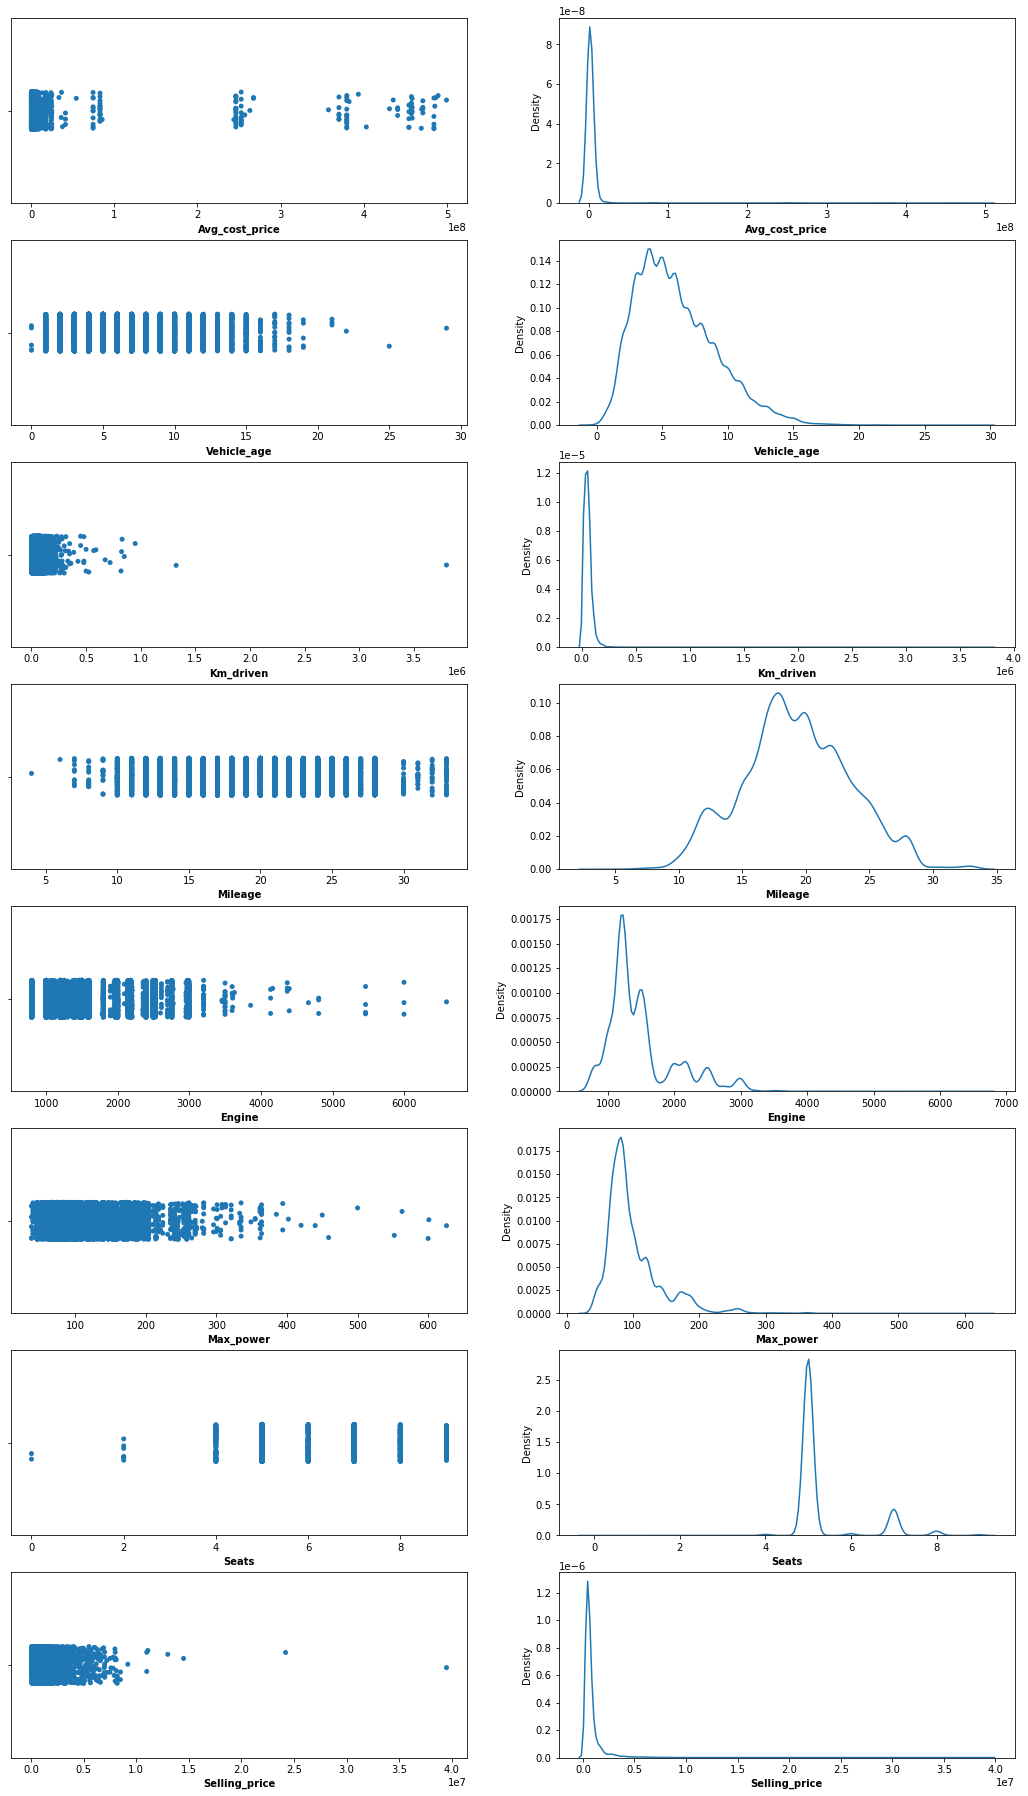

In [49]:
# nc = ['avg_cost_price','vehicle_age','km_driven','mileage','engine','max_power','seats','selling_price'] 


fig = plt.figure(figsize=(18,32))
gs = fig.add_gridspec(8,2)

#Row 1
ax00 = fig.add_subplot(gs[0,0])
ax00_s = sns.stripplot(x = df3['avg_cost_price'])
ax00_s.set_xlabel(xlabel='Avg_cost_price', fontsize=10, weight='bold')

ax01 = fig.add_subplot(gs[0,1])
ax01_s = sns.kdeplot(x = df3['avg_cost_price'])
ax01_s.set_xlabel(xlabel='Avg_cost_price', fontsize=10, weight='bold')

# Row 2
ax10 = fig.add_subplot(gs[1,0])
ax10_s = sns.stripplot(x = df3['vehicle_age'])
ax10_s.set_xlabel(xlabel='Vehicle_age', fontsize=10, weight='bold')

ax11 = fig.add_subplot(gs[1,1])
ax11_s = sns.kdeplot(x = df3['vehicle_age'])
ax11_s.set_xlabel(xlabel='Vehicle_age', fontsize=10, weight='bold')

#Row 3
ax20 = fig.add_subplot(gs[2,0])
ax20_s = sns.stripplot(x = df3['km_driven'])
ax20_s.set_xlabel(xlabel='Km_driven', fontsize=10, weight='bold')


ax21 = fig.add_subplot(gs[2,1])
ax21_s = sns.kdeplot(x = df3['km_driven'])
ax21_s.set_xlabel(xlabel='Km_driven', fontsize=10, weight='bold')

#Row 4
ax30 = fig.add_subplot(gs[3,0])
ax30_s = sns.stripplot(x = df3['mileage'])
ax30_s.set_xlabel(xlabel='Mileage', fontsize=10, weight='bold')

ax31 = fig.add_subplot(gs[3,1])
ax31_s = sns.kdeplot(x = df3['mileage'])
ax31_s.set_xlabel(xlabel='Mileage', fontsize=10, weight='bold')

#Row 5
ax40 = fig.add_subplot(gs[4,0])
ax40_s = sns.stripplot(x = df3['engine'])
ax40_s.set_xlabel(xlabel='Engine', fontsize=10, weight='bold')

ax41 = fig.add_subplot(gs[4,1])
ax41_s = sns.kdeplot(x = df3['engine'])
ax41_s.set_xlabel(xlabel='Engine', fontsize=10, weight='bold')

#Row 5
ax50 = fig.add_subplot(gs[5,0])
ax50_s = sns.stripplot(x = df3['max_power'])
ax50_s.set_xlabel(xlabel='Max_power', fontsize=10, weight='bold')

ax51 = fig.add_subplot(gs[5,1])
ax51_s = sns.kdeplot(x = df3['max_power'])
ax51_s.set_xlabel(xlabel='Max_power', fontsize=10, weight='bold')

#Row 7
ax60 = fig.add_subplot(gs[6,0])
ax60_s = sns.stripplot(x = df3['seats'])
ax60_s.set_xlabel(xlabel='Seats', fontsize=10, weight='bold')


ax61 = fig.add_subplot(gs[6,1])
ax61_s = sns.kdeplot(x = df3['seats'])
ax61_s.set_xlabel(xlabel='Seats', fontsize=10, weight='bold')

#Row 8
ax70 = fig.add_subplot(gs[7,0])
ax70_s = sns.stripplot(x = df3['selling_price'])
ax70_s.set_xlabel(xlabel='Selling_price', fontsize=10, weight='bold')

ax71 = fig.add_subplot(gs[7,1])
ax71_s = sns.kdeplot(x = df3['selling_price'])
ax71_s.set_xlabel(xlabel='Selling_price', fontsize=10, weight='bold')

plt.show()

##### Bivariate analysis

In [50]:
# Bivariate Analysis of two Numerical Variables (Numerical-Numerical)


In [51]:
# To form a matrix from a dataframe which computes pairwise correlation of columns, excluding NA/null values.
matrix = df3.corr()

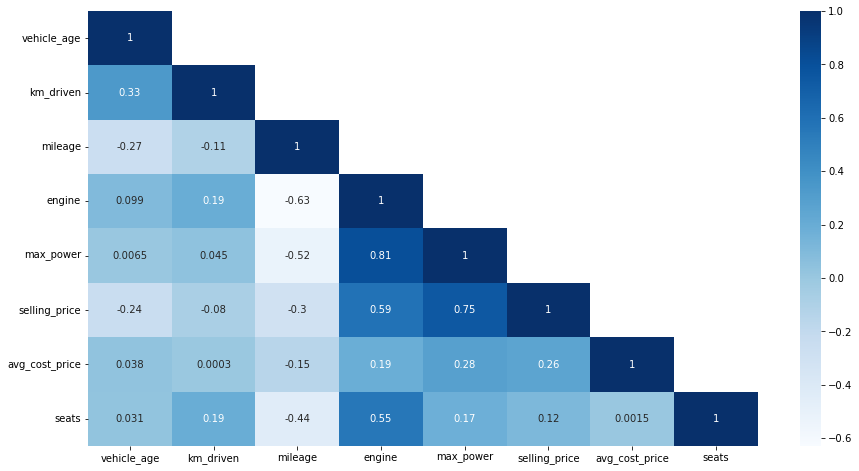

In [52]:
# Top show correlation among numerical columns
fig = plt.figure(figsize=(15,8))
ax = sns.heatmap(matrix, cmap='Blues' ,mask=np.triu(matrix, k=1),annot=True,)
ax.set_facecolor('white')

plt.show()

<Figure size 1296x2592 with 0 Axes>

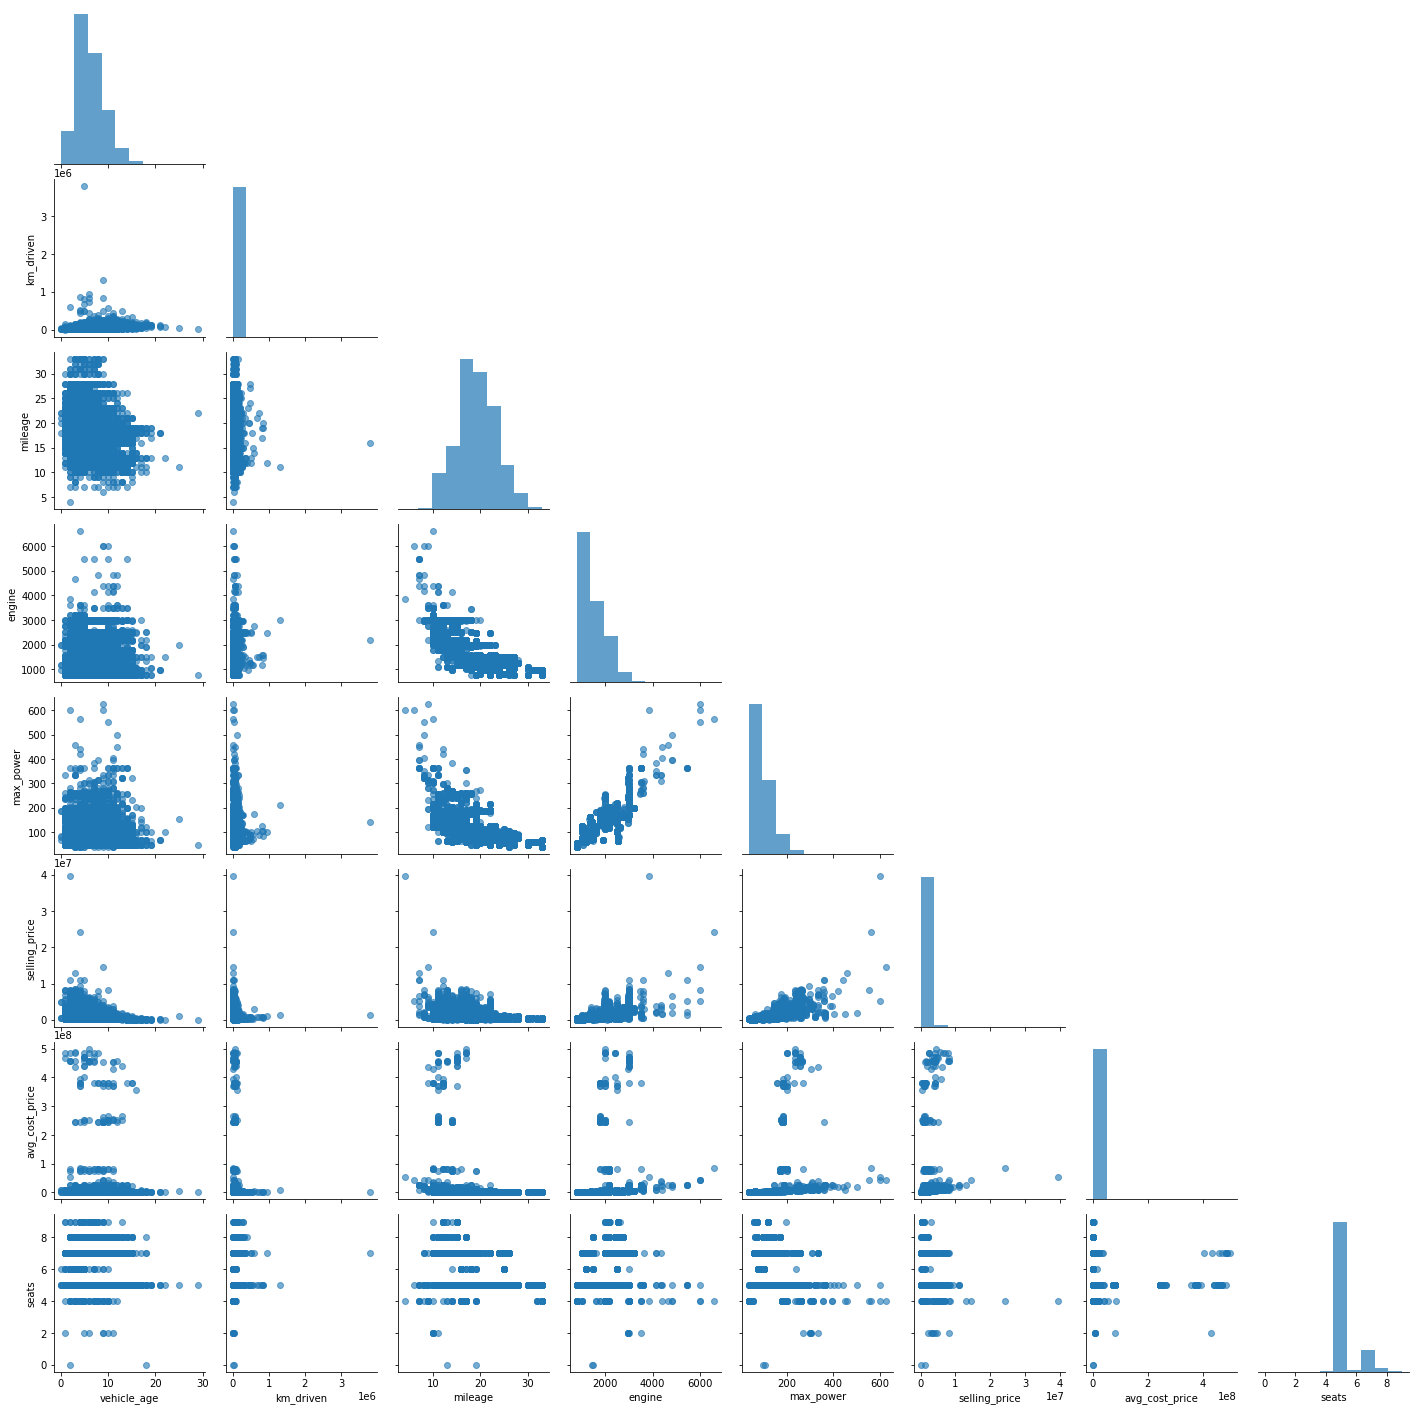

In [53]:
fig = plt.figure(figsize=(18,36))

g = sns.PairGrid(df3, diag_sharey = False, corner = True)
g.map_lower(plt.scatter, alpha = 0.6)
g.map_diag(plt.hist, alpha = 0.7)

plt.show()

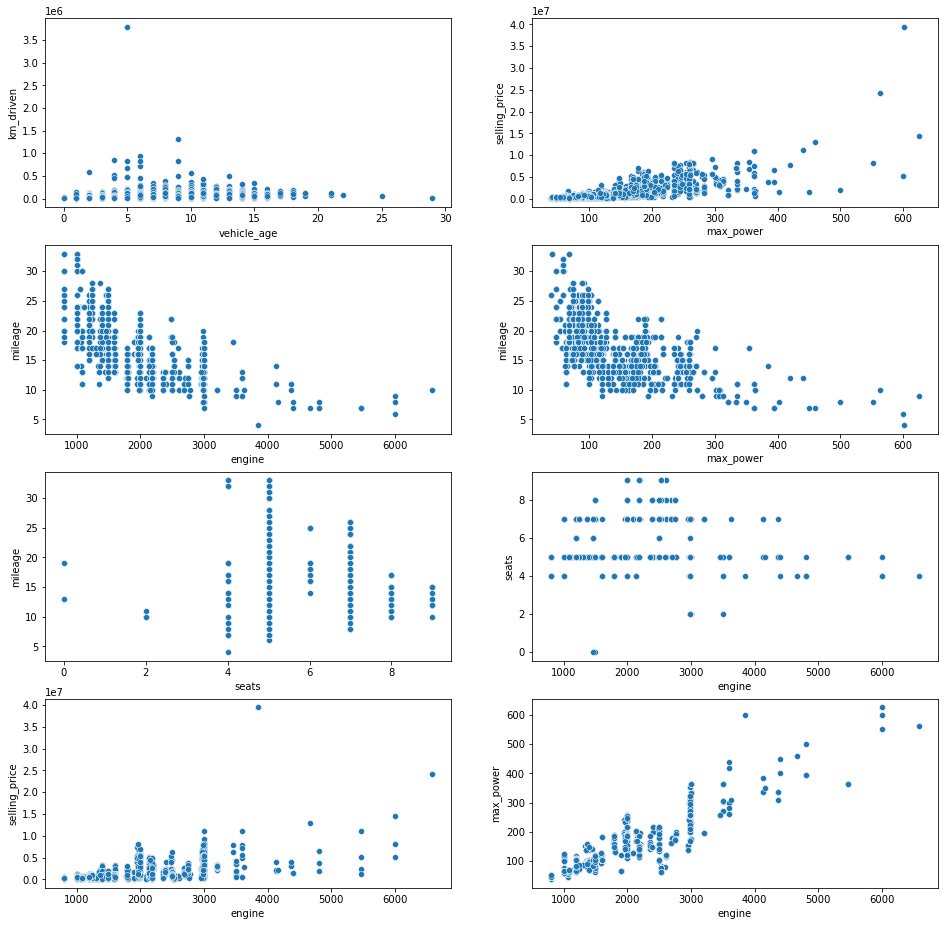

In [54]:
# Plotting scatterplot between those numerical variables which has moderate to high correlation (>0.3 or <-0.3)


fig = plt.figure(figsize=(16,16))
gs = fig.add_gridspec(4,2)

#Row 1
ax00 = fig.add_subplot(gs[0,0])
ax00_s = sns.scatterplot(data=df3, x='vehicle_age', y='km_driven')

ax01 = fig.add_subplot(gs[0,1])
ax01_s = sns.scatterplot(data=df3, x="max_power", y="selling_price")


#Row 2
ax10 = fig.add_subplot(gs[1,0])
ax10_s = sns.scatterplot(data=df3, x="engine", y="mileage")

ax11 = fig.add_subplot(gs[1,1])
ax11_s = sns.scatterplot(data=df3, x="max_power", y="mileage")

#Row 3
ax20 = fig.add_subplot(gs[2,0])
ax20_s = sns.scatterplot(data=df3, x="seats", y="mileage")

ax21 = fig.add_subplot(gs[2,1])
ax21_s = sns.scatterplot(data=df3, x="engine", y="seats")

#Row 4
ax30 = fig.add_subplot(gs[3,0])
ax30_s = sns.scatterplot(data=df3, x="engine", y="selling_price")

ax31 = fig.add_subplot(gs[3,1])
ax31_s = sns.scatterplot(data=df3, x="engine", y="max_power")





In [55]:
# Categorical vs Numerical Plots

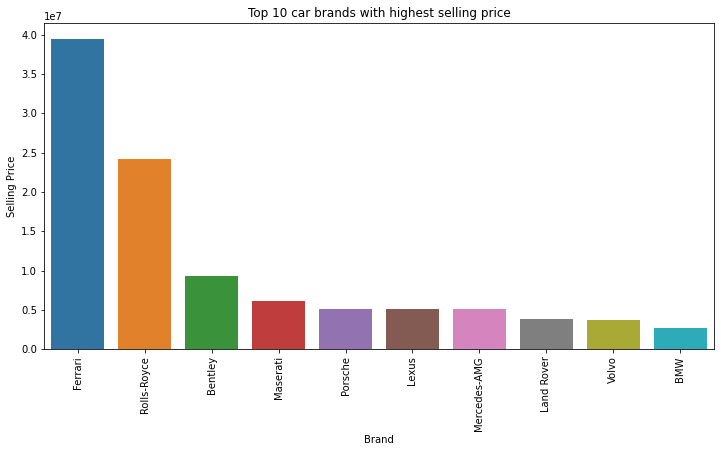

In [56]:
# Top 10 brands with highest selling price
fig = plt.figure(figsize=(12,6))
cars = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10)

sns.color_palette("pastel")
ax = sns.barplot(x=cars.index, y=cars.values)
ax.set(title='Top 10 car brands with highest selling price')
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.set(ylabel='Selling Price', xlabel='Brand')


plt.show()

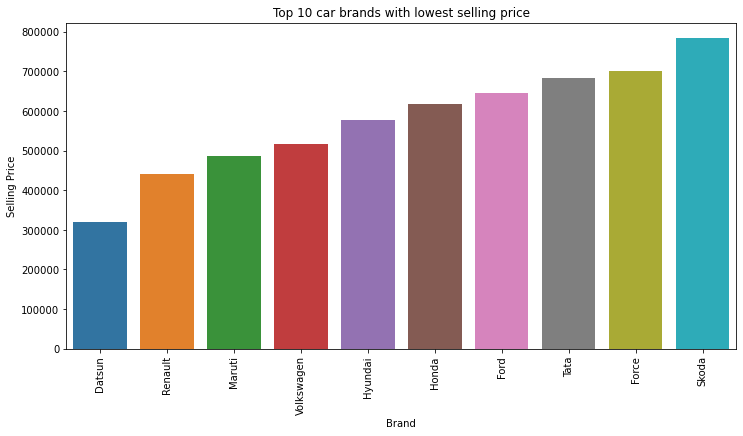

In [57]:
# Top 10 brands with lowest selling price
fig = plt.figure(figsize=(12,6))
cars = df.groupby('brand')['selling_price'].mean().sort_values(ascending=True).head(10)

sns.color_palette("pastel")
ax = sns.barplot(x=cars.index, y=cars.values)
ax.set(title='Top 10 car brands with lowest selling price')
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.set(ylabel='Selling Price', xlabel='Brand')


plt.show()

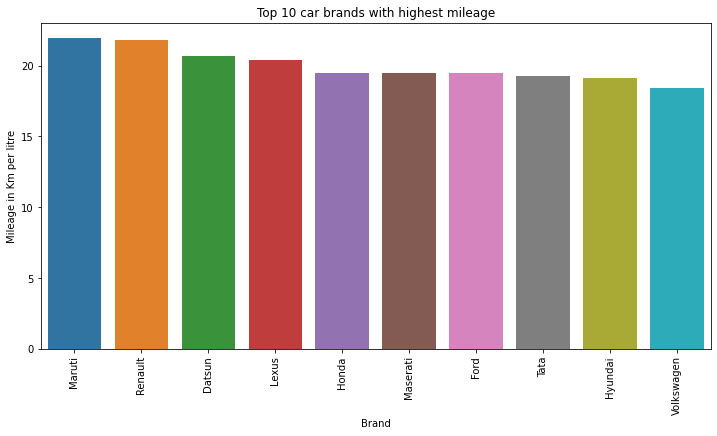

In [58]:
# Top 10 brands with highest mileage
fig = plt.figure(figsize=(12,6))
cars = df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(10)

sns.color_palette("pastel")
ax = sns.barplot(x=cars.index, y=cars.values)
ax.set(title='Top 10 car brands with highest mileage')
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.set(ylabel='Mileage in Km per litre', xlabel='Brand')


plt.show()

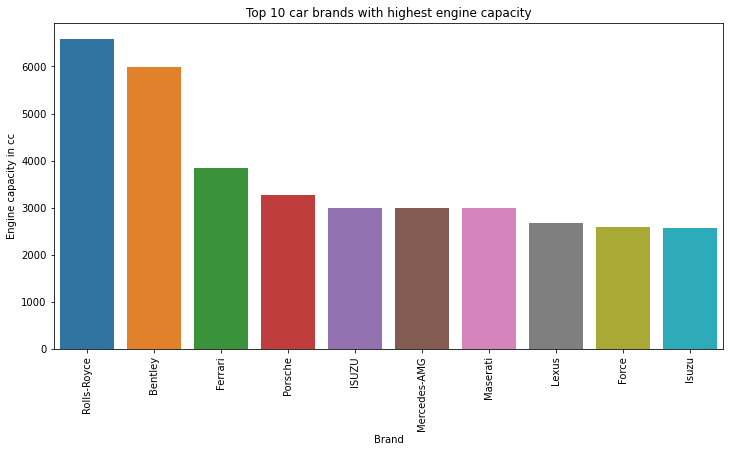

In [59]:
# Top 10 brands with highest engine cc
fig = plt.figure(figsize=(12,6))
cars = df.groupby('brand')['engine'].mean().sort_values(ascending=False).head(10)

sns.color_palette("pastel")
ax = sns.barplot(x=cars.index, y=cars.values)
ax.set(title='Top 10 car brands with highest engine capacity')
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.set(ylabel='Engine capacity in cc', xlabel='Brand')


plt.show()

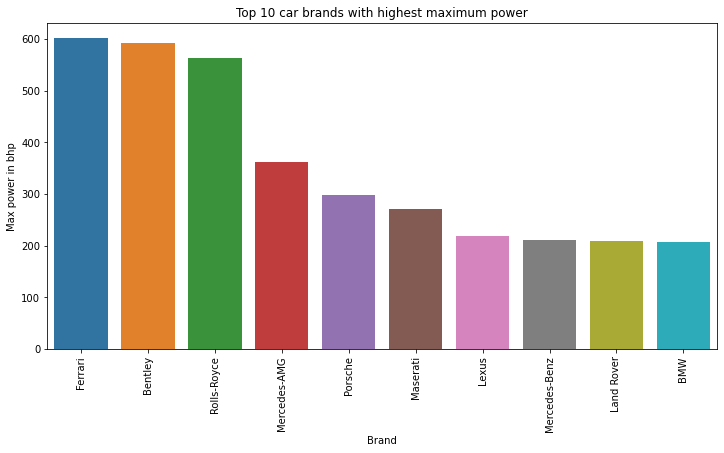

In [60]:
# Top 10 brands with highest max power
fig = plt.figure(figsize=(12,6))
cars = df.groupby('brand')['max_power'].mean().sort_values(ascending=False).head(10)

sns.color_palette("pastel")
ax = sns.barplot(x=cars.index, y=cars.values)
ax.set(title='Top 10 car brands with highest maximum power')
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.set(ylabel='Max power in bhp', xlabel='Brand')


plt.show()

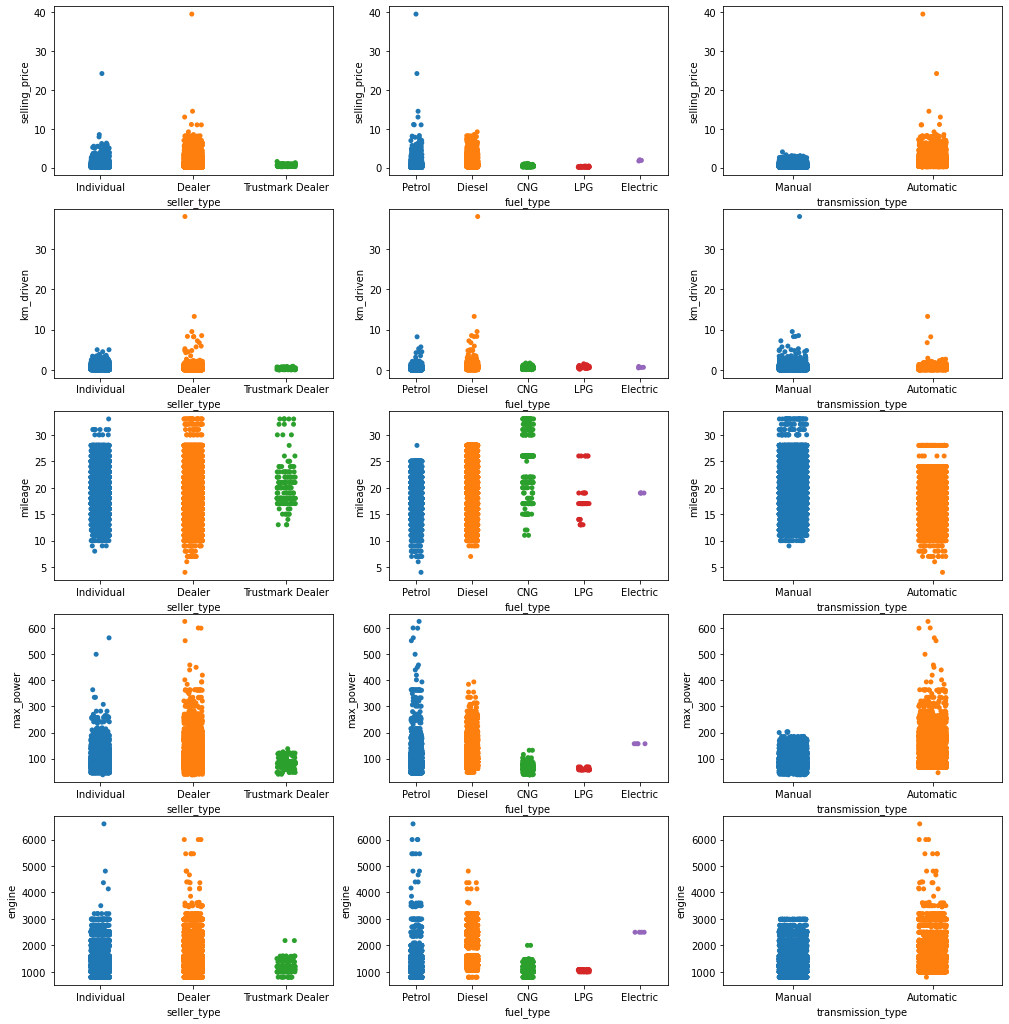

In [61]:
fig = plt.figure(figsize=(17,18))
gs = fig.add_gridspec(5,3)

#Row 1
ax00 = fig.add_subplot(gs[0,0])
ax00_s = sns.stripplot(x=df.seller_type, y=df.selling_price/1000000, size=5)

ax01 = fig.add_subplot(gs[0,1])
ax01_s = sns.stripplot(x=df.fuel_type, y=df.selling_price/1000000, size=5)

ax02 = fig.add_subplot(gs[0,2])
ax02_s = sns.stripplot(x=df.transmission_type, y=df.selling_price/1000000, size=5)

#Row 2
ax10 = fig.add_subplot(gs[1,0])
ax10_s = sns.stripplot(x=df.seller_type, y=df.km_driven/100000, size=5)

ax11 = fig.add_subplot(gs[1,1])
ax11_s = sns.stripplot(x=df.fuel_type, y=df.km_driven/100000, size=5)

ax12 = fig.add_subplot(gs[1,2])
ax12_s = sns.stripplot(x=df.transmission_type, y=df.km_driven/100000, size=5)

#Row 3
ax20 = fig.add_subplot(gs[2,0])
ax20_s = sns.stripplot(x=df.seller_type, y=df.mileage, size=5)

ax21 = fig.add_subplot(gs[2,1])
ax21_s = sns.stripplot(x=df.fuel_type, y=df.mileage, size=5)

ax22 = fig.add_subplot(gs[2,2])
ax22_s = sns.stripplot(x=df.transmission_type, y=df.mileage, size=5)

#Row 4
ax30 = fig.add_subplot(gs[3,0])
ax30_s = sns.stripplot(x=df.seller_type, y=df.max_power, size=5)

ax31 = fig.add_subplot(gs[3,1])
ax31_s = sns.stripplot(x=df.fuel_type, y=df.max_power, size=5)

ax32 = fig.add_subplot(gs[3,2])
ax32_s = sns.stripplot(x=df.transmission_type, y=df.max_power, size=5)

#Row 5
ax40 = fig.add_subplot(gs[4,0])
ax40_s = sns.stripplot(x=df.seller_type, y=df.engine, size=5)

ax41 = fig.add_subplot(gs[4,1])
ax41_s = sns.stripplot(x=df.fuel_type, y=df.engine, size=5)

ax42 = fig.add_subplot(gs[4,2])
ax42_s = sns.stripplot(x=df.transmission_type, y=df.engine, size=5)

In [62]:
# Categorical vs categorical plots

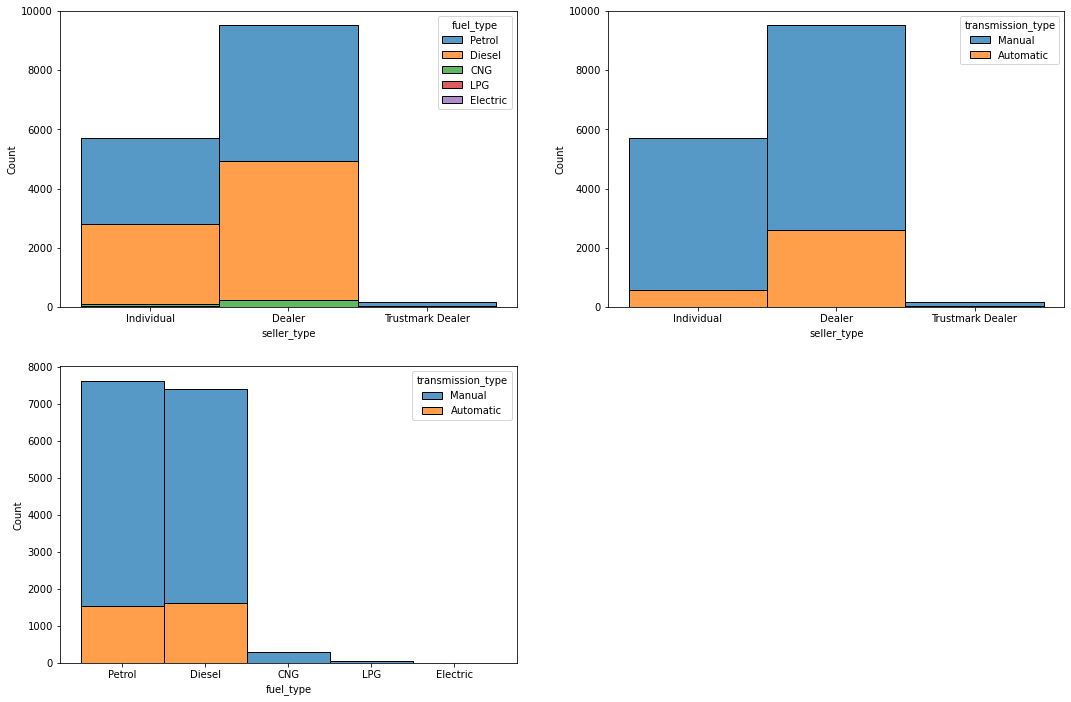

In [63]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)

# Seller type based on the type of fuel used in cars
ax00 = fig.add_subplot(gs[0,0])
ax00_s = sns.histplot( x="seller_type", hue="fuel_type", data=df2, stat="count", multiple="stack")

# Seller type based on the type of transmission used in cars
ax01 = fig.add_subplot(gs[0,1])
ax01_s = sns.histplot( x="seller_type", hue="transmission_type", data=df2, stat="count", multiple="stack")

# Fuel type based on the type of transmission used in cars
ax10 = fig.add_subplot(gs[1,0])
ax10_s = sns.histplot( x="fuel_type", hue="transmission_type", data=df2, stat="count", multiple="stack")



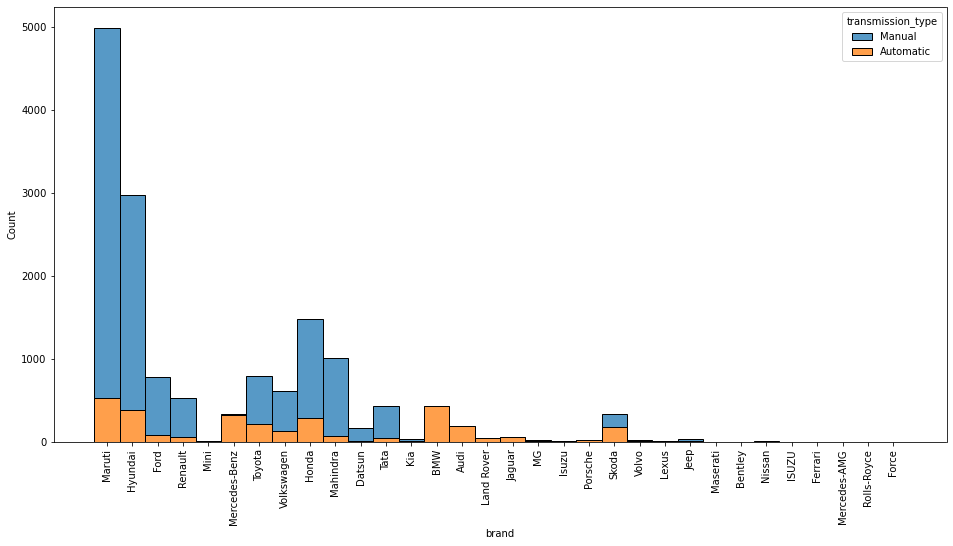

In [64]:
# Brands by the type of transmission used
fig = plt.figure(figsize=(16,8))

ax00_s = sns.histplot( x="brand", hue="transmission_type", data=df2, stat="count", multiple="stack")

plt.xticks(rotation=90)


plt.show()

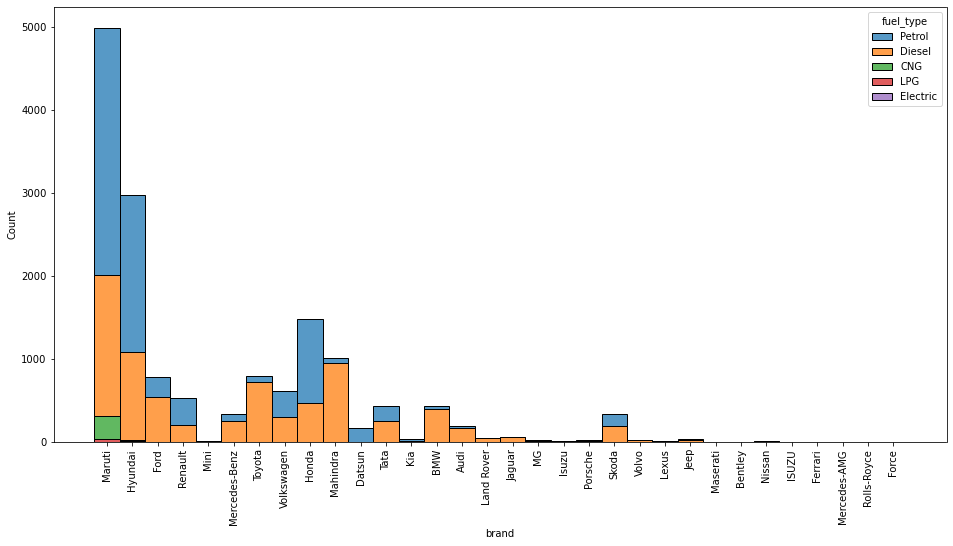

In [65]:
# Brands by the type of fuel used

fig = plt.figure(figsize=(16,8))

ax00_s = sns.histplot( x="brand", hue="fuel_type", data=df2, stat="count", multiple="stack")

plt.xticks(rotation=90)

plt.show()

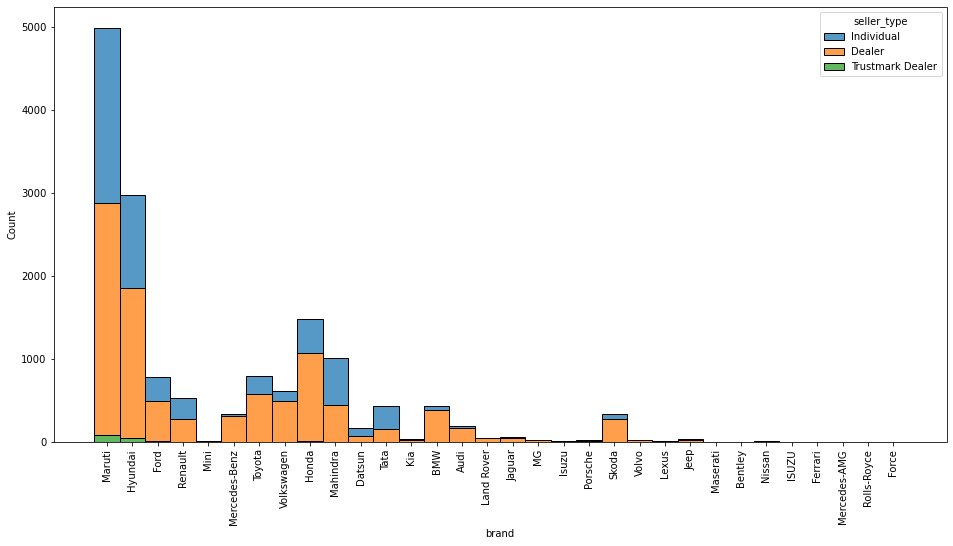

In [66]:
# Brands by the type of seller

fig = plt.figure(figsize=(16,8))

ax00_s = sns.histplot( x="brand", hue="seller_type", data=df2, stat="count", multiple="stack")

plt.xticks(rotation=90)

plt.show()

#### Checking for outliers

In [67]:
# From the graph above we can find that only 2 values above 2 crore
df[df['selling_price'] > 20000000]

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
3799,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4,3855,601,4,39500000,54250000
10969,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10,6592,563,4,24200000,85350000


In [68]:
# Since the costliest car by selling price have avg cost price of above 8 crores we need to remove those cars where avg_cost_price is more than 8 crores

In [69]:
df[df['avg_cost_price'] > 80000000]

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
77,Mercedes-Benz,C-Class,9,74352,Dealer,Petrol,Automatic,11,1796,186,5,775000,246100000
282,Mercedes-Benz,E-Class,9,58000,Dealer,Petrol,Manual,12,1796,185,5,1250000,370050000
318,Land Rover,Rover,3,25000,Individual,Petrol,Automatic,9,2995,335,7,6200000,435350000
736,Mercedes-Benz,C-Class,9,41315,Dealer,Petrol,Automatic,11,1796,186,5,1050000,246100000
835,Mercedes-Benz,E-Class,10,60000,Dealer,Petrol,Manual,12,1796,185,5,890000,370050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14620,BMW,X5,5,48000,Dealer,Diesel,Automatic,15,2993,258,5,4495000,470900000
14796,Mercedes-Benz,E-Class,15,78000,Dealer,Petrol,Automatic,10,1796,157,5,500000,379450000
14898,Mercedes-Benz,C-Class,6,35000,Dealer,Petrol,Automatic,14,1991,181,5,2250000,252500000
14978,Mercedes-Benz,C-Class,9,60000,Individual,Petrol,Automatic,11,1796,186,5,1060000,262950000


In [70]:
# Number of cars which have been driven more than 10 lakh kms
df[df['km_driven'] > 1000000]

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
11903,Mercedes-Benz,E-Class,9,1325000,Dealer,Diesel,Automatic,11,2987,210,5,1350000,8859500
15409,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16,2179,140,7,1225000,2137000


In [71]:
# Number of cars which have been mileage more than 50
df[df['mileage'] > 50]

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price


In [72]:
# Number of cars which have been engine cc more than 6000

df[df['engine'] > 6000]

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
10969,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10,6592,563,4,24200000,85350000


In [73]:
# Number of cars which have been torque more than 500 Newton metres

df[df['max_power'] > 500]

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
1172,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9,5998,626,4,14500000,41250000
3799,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4,3855,601,4,39500000,54250000
10040,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6,5998,600,5,5200000,41250000
10969,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10,6592,563,4,24200000,85350000
12997,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8,5998,552,4,8100000,41250000


In [74]:
# Number of cars which have been less than 2 seats

df[df['seats']<2]

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
3217,Honda,City,18,40000,Individual,Petrol,Manual,13,1493,100,0,115000,1494500
12619,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19,1461,108,0,1154000,1400333


In [75]:
# Changed the number of seats to 5 where it was zero with the help of domain knowlege
df.loc[df['seats']<2, 'seats'] = 5

In [76]:
# Removing the outliers as it will cause model to overfit
df = df[df['selling_price'] < 20000000]
df = df[df['km_driven'] < 1000000]
df = df[df['mileage'] < 100]
df = df[df['engine'] <= 6000]
df = df[df['max_power'] <= 500]
df = df[df['avg_cost_price'] <= 80000000]
df = df.reset_index(drop=True)

In [77]:
df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19,796,46,5,120000,411202
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18,1197,82,5,550000,729500
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17,1197,80,5,215000,1081004
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20,998,67,5,226000,411202
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22,1498,98,5,570000,1196500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15294,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18,1197,82,5,545000,707119
15295,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19,1086,68,5,250000,713826
15296,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17,1373,91,7,925000,1038372
15297,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21,1498,103,5,425000,1228091


In [93]:
# Converting the cleaned dataframe into 'final_dataset' csv file
df.to_csv('final_dataset', index=False)

### PHASE 3 CODE

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce # pip install category_encoders

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import RandomizedSearchCV


from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import VotingRegressor


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam


import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('final_dataset')
df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19,796,46,5,120000,411202
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18,1197,82,5,550000,729500
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17,1197,80,5,215000,1081004
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20,998,67,5,226000,411202
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22,1498,98,5,570000,1196500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15294,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18,1197,82,5,545000,707119
15295,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19,1086,68,5,250000,713826
15296,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17,1373,91,7,925000,1038372
15297,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21,1498,103,5,425000,1228091


###### Model Evaluation Function

In [113]:
def do_prediction(regressor):
    
    # training the classifier on the dataset
    regressor.fit(X_train, y_train)
    
    #Do prediction and evaluting the prediction
    prediction = regressor.predict(X_test)
    cross_validation_score = cross_val(X_train, y_train, regressor)
    error = median_absolute_error(y_test, prediction)
    error2 = r2_score(y_test, prediction)
    
    return cross_validation_score, error, error2

def cross_val(X_train, y_train, regressor):
    
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

In [114]:
model_performance_df = {"Regressor":[], "CV_Score":[], "Median_Abs_Error":[],"R2_Score":[]}

def model_performance(regressor_name, cv_score, mae, r2_score):
    model_performance_df['Regressor'].append(regressor_name)
    model_performance_df['CV_Score'].append(cv_score)
    model_performance_df['R2_Score'].append(r2_score)
    model_performance_df['Median_Abs_Error'].append(mae)

###### Feature Importance Plotting Function

In [115]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
  
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],palette="tab10")
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE SCORES')
    plt.ylabel('FEATURE NAMES')

###### Model plotting

In [116]:
def model_error_plotting(y_pred):
    error = y_test.squeeze() - y_pred
    fig = plt.figure(figsize=(16,4))
    gs = fig.add_gridspec(1,2)

    #Row 1
    ax00 = fig.add_subplot(gs[0,0])
    ax00_s = sns.scatterplot(y=y_test.squeeze(),x= y_pred)
    ax00_s.set_xlabel(xlabel='y_pred', fontsize=10, weight='bold')
    ax00_s.set_ylabel(ylabel='y_actual', fontsize=10, weight='bold')
    ax00_s.set_title('Y_predicted vs Y_actual', fontsize=13, weight='bold')

    ax01 = fig.add_subplot(gs[0,1])
    ax01_s = sns.kdeplot(x = error)
    ax01_s.set_xlabel(xlabel='Error ', fontsize=10, weight='bold')
    ax01_s.set_ylabel(ylabel='Density', fontsize=10, weight='bold')
    ax01_s.set_title('Error Distribution', fontsize=13, weight='bold')

    plt.show()

###### Printing evaluation metrics function

In [117]:
def printing(score, error, error2):
    print('Cross validation score: {}'.format(round(score,2)))
    print('Median Absolute Error: {}'.format(round(error,2)))
    print('R2 score: {}'.format(round(error2,2)))

###### Splitting into input and target variable

In [118]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [119]:
categorical_features = ['seller_type','transmission_type', 'fuel_type', 'brand','model']

numerical_features = ['vehicle_age','km_driven','mileage','engine','max_power','avg_cost_price','seats']

###### Splitting into train and test set

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=10)

###### Creating a baseline model

In [121]:
def baseline_prediction(avg_cost_price):
    return avg_cost_price//2

In [122]:
manual_y_predictions = np.array([baseline_prediction(val) for val in X_train['avg_cost_price']])

In [123]:
median_absolute_error(y_train, manual_y_predictions)

160500.0

In [124]:
r2_score(y_train, manual_y_predictions)

-1.7881830786773518

###### Creating a pipeline for numerical and categorical features

In [125]:
numeric_pipeline = Pipeline(steps=[
    ('scaling', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoding', ce.BinaryEncoder())
])

###### Creating a column transformer for numerical and categorical features

In [126]:
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

In [127]:
full_processor.fit_transform(X_train)

array([[-0.34939151,  0.23552316,  0.42249691, ...,  0.        ,
         0.        ,  1.        ],
       [-1.01001298, -1.12144166,  0.42249691, ...,  0.        ,
         1.        ,  0.        ],
       [-1.67063444, -1.24513946,  0.6646728 , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.01908078, -0.62665048,  0.6646728 , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.64154068, -0.32977577,  0.6646728 , ...,  1.        ,
         1.        ,  0.        ],
       [-0.34939151, -0.87404607, -1.27273434, ...,  1.        ,
         1.        ,  0.        ]])

In [128]:
encoder = ce.BinaryEncoder(cols=['seller_type','fuel_type','transmission_type','brand','model'], return_df=True)
X_train_1 = encoder.fit_transform(X_train)

##### Modelling

###### 1. Linear Regression

In [129]:
linear_regression = LinearRegression()

linear_regression_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', linear_regression)
])

In [130]:
linear_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['vehicle_age', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power',
                                                   'avg_cost_price', 'seats']),
                                                 ('category',
                                                  Pipeline(steps=[('encoding',
                                                                   BinaryEncoder())]),
                                                  ['seller_type',
                                                   'transmission_type',
                                                   'fuel_type', 'brand',
                                                   'model'])])),
                ('model', LinearRegression())])

In [131]:
score, error, error2 = do_prediction(linear_regression_pipeline)
printing(score, error, error2)

Cross validation score: 0.7
Median Absolute Error: 132149.62
R2 score: 0.72


In [132]:
# To create a dataframe containing the performance of each models
model_performance('LinearRegression', score, error, error2)

In [133]:
preds = linear_regression_pipeline.predict(X_test)

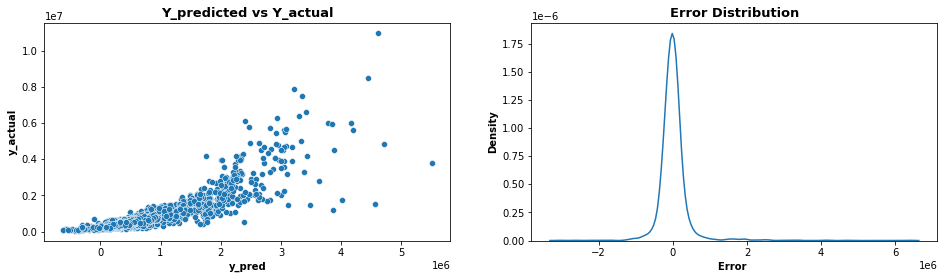

In [134]:
# Plotting the error distribution graphs

model_error_plotting(preds)

###### 2. Lasso Regression

In [135]:
lasso = linear_model.Lasso(alpha=0.1)

lasso_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', lasso)
])

In [136]:
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['vehicle_age', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power',
                                                   'avg_cost_price', 'seats']),
                                                 ('category',
                                                  Pipeline(steps=[('encoding',
                                                                   BinaryEncoder())]),
                                                  ['seller_type',
                                                   'transmission_type',
                                                   'fuel_type', 'brand',
                                                   'model'])])),
                ('model', Lasso(alpha=0.1))])

In [137]:
score, error, error2 = do_prediction(lasso_pipeline)
printing(score, error, error2)

Cross validation score: 0.7
Median Absolute Error: 132144.0
R2 score: 0.72


In [138]:
# To create a dataframe containing the performance of each models
model_performance('LassoRegression', score, error, error2)

In [139]:
preds = lasso_pipeline.predict(X_test)

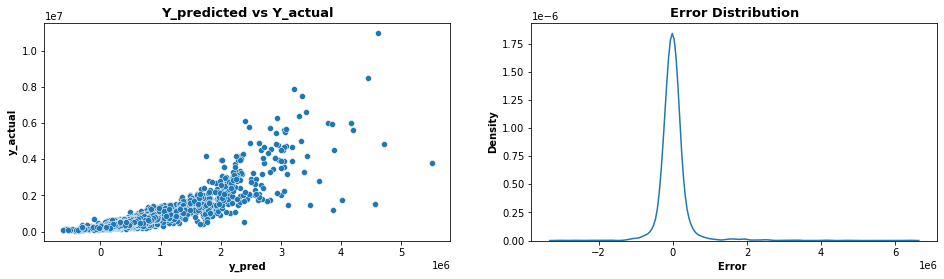

In [140]:
# Plotting the error distribution graphs

model_error_plotting(preds)

###### 3. Ridge Regression

In [141]:
ridge = linear_model.Ridge(alpha=0.5)

ridge_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', ridge)
])

In [142]:
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['vehicle_age', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power',
                                                   'avg_cost_price', 'seats']),
                                                 ('category',
                                                  Pipeline(steps=[('encoding',
                                                                   BinaryEncoder())]),
                                                  ['seller_type',
                                                   'transmission_type',
                                                   'fuel_type', 'brand',
                                                   'model'])])),
                ('model', Ridge(alpha=0.5))])

In [143]:
score, error, error2 = do_prediction(ridge_pipeline)
printing(score, error, error2)

Cross validation score: 0.7
Median Absolute Error: 132128.82
R2 score: 0.72


In [144]:
# To create a dataframe containing the performance of each models
model_performance('RidgeRegression', score, error, error2)

In [145]:
preds = ridge_pipeline.predict(X_test)

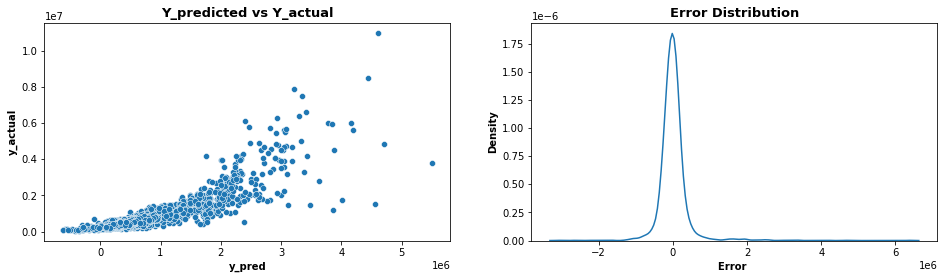

In [146]:
# Plotting the error distribution graphs

model_error_plotting(preds)

###### 4. Decision Tree

In [147]:
dt = DecisionTreeRegressor()

dt_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', dt)
])

In [148]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['vehicle_age', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power',
                                                   'avg_cost_price', 'seats']),
                                                 ('category',
                                                  Pipeline(steps=[('encoding',
                                                                   BinaryEncoder())]),
                                                  ['seller_type',
                                                   'transmission_type',
                                                   'fuel_type', 'brand',
                                                   'model'])])),
                ('model', DecisionTreeRegressor())])

In [149]:
score, error, error2 = do_prediction(dt_pipeline)
printing(score, error, error2)

Cross validation score: 0.91
Median Absolute Error: 56000.0
R2 score: 0.91


In [150]:
# To create a dataframe containing the performance of each models
model_performance('DecisionTree', score, error, error2)

In [151]:
preds = dt_pipeline.predict(X_test)

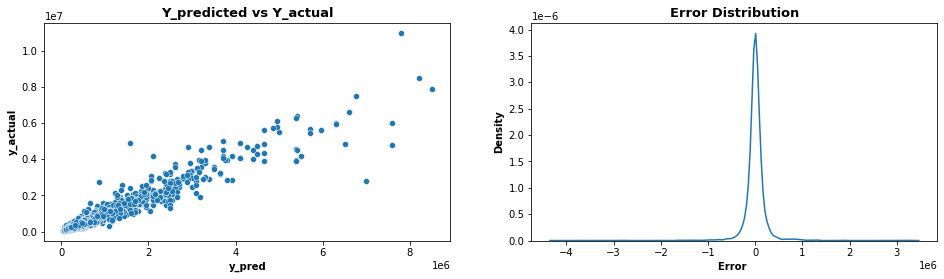

In [152]:
# Plotting the error distribution graphs

model_error_plotting(preds)

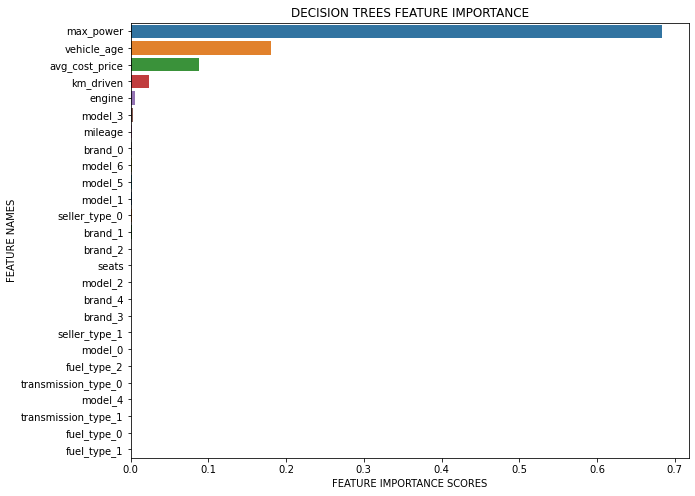

In [153]:
# Plotting feature importance graph
dt.fit(X_train_1, y_train)
plot_feature_importance(dt.feature_importances_,X_train_1.columns,'DECISION TREES')

###### 5. Support Vector Regression

In [154]:
svr = SVR()

svr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', svr)
])

In [155]:
svr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['vehicle_age', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power',
                                                   'avg_cost_price', 'seats']),
                                                 ('category',
                                                  Pipeline(steps=[('encoding',
                                                                   BinaryEncoder())]),
                                                  ['seller_type',
                                                   'transmission_type',
                                                   'fuel_type', 'brand',
                                                   'model'])])),
                ('model', SVR())])

In [156]:
score, error, error2 = do_prediction(svr_pipeline)
printing(score, error, error2)

Cross validation score: -0.07
Median Absolute Error: 199597.39
R2 score: -0.07


In [157]:
# To create a dataframe containing the performance of each models
model_performance('SupportVectorRegression', score, error, error2)

In [158]:
preds = svr_pipeline.predict(X_test)

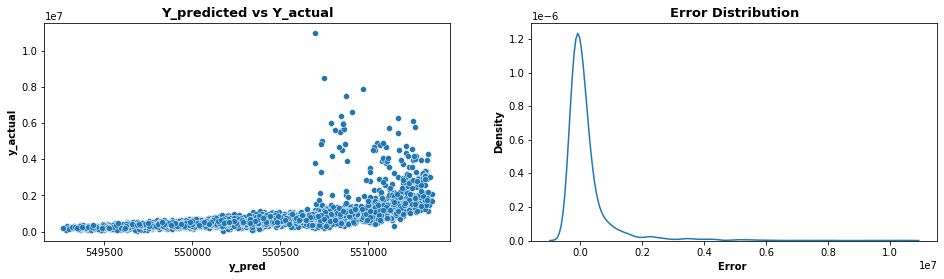

In [159]:
# Plotting the error distribution graphs

model_error_plotting(preds)

### PHASE 4 CODE

##### Ensemble Techniques

###### 1. Bagging Techniques

###### 1.1 Bagging Meta Estimator

In [160]:
bme = BaggingRegressor(base_estimator = DecisionTreeRegressor(), n_estimators=10, random_state=0)

bme_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', bme)
])

In [161]:
score, error, error2 = do_prediction(bme_pipeline)
printing(score, error, error2)

Cross validation score: 0.94
Median Absolute Error: 49225.0
R2 score: 0.95


In [162]:
# To create a dataframe containing the performance of each models
model_performance('BaggingRegressor', score, error, error2)

In [163]:
y_pred_bme = bme_pipeline.predict(X_test)

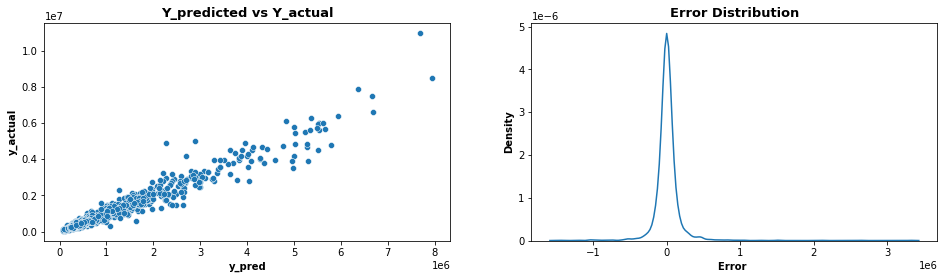

In [164]:
# Plotting the error distribution graphs

model_error_plotting(y_pred_bme)

###### 1.2 Random Forest

In [165]:
rf = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', rf)
])

In [166]:
score, error, error2 = do_prediction(rf_pipeline)
printing(score, error, error2)

Cross validation score: 0.95
Median Absolute Error: 48450.0
R2 score: 0.95


In [167]:
# To create a dataframe containing the performance of each models
model_performance('RandomForestRegressor', score, error, error2)

In [168]:
y_pred_rf = rf_pipeline.predict(X_test)

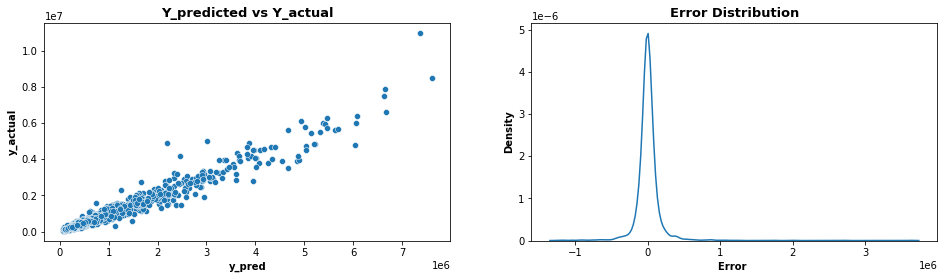

In [169]:
# Plotting the error distribution graphs

model_error_plotting(y_pred_rf)

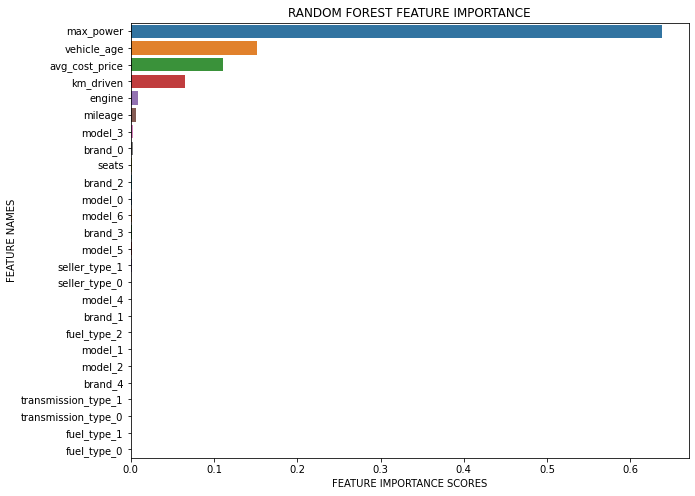

In [170]:
# Plotting feature importance graph
rf.fit(X_train_1, y_train)
plot_feature_importance(rf.feature_importances_,X_train_1.columns,'RANDOM FOREST')

###### 1.3 Extra Trees Regressor

In [171]:
etr = ExtraTreesRegressor()
etr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', etr)
])

In [172]:
score, error, error2 = do_prediction(etr_pipeline)

printing(score, error, error2)

Cross validation score: 0.95
Median Absolute Error: 49675.0
R2 score: 0.94


In [173]:
# To create a dataframe containing the performance of each models
model_performance('ExtraTreesRegressor', score, error, error2)

In [174]:
y_pred_etr = etr_pipeline.predict(X_test)

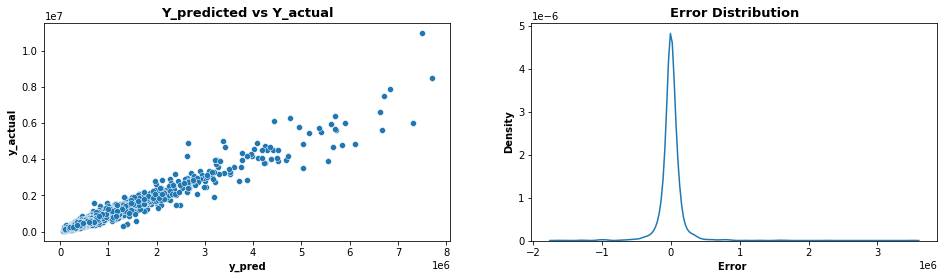

In [175]:
# Plotting the error distribution graphs

model_error_plotting(y_pred_etr)

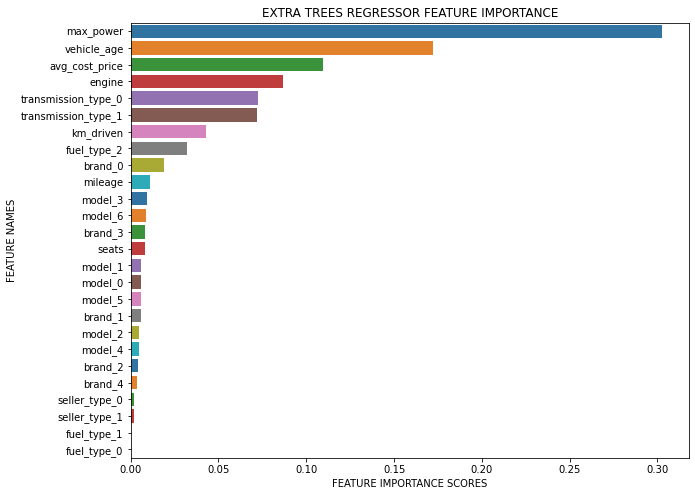

In [176]:
# Plotting feature importance graph
etr.fit(X_train_1, y_train)
plot_feature_importance(etr.feature_importances_,X_train_1.columns,'EXTRA TREES REGRESSOR')

###### 2. Boosting Techniques

###### 2.1 AdaBoost

In [177]:
ada = AdaBoostRegressor()
ada_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', ada)
])

In [178]:
score, error, error2 = do_prediction(ada_pipeline)

printing(score, error, error2)

Cross validation score: 0.76
Median Absolute Error: 202875.84
R2 score: 0.81


In [179]:
# To create a dataframe containing the performance of each models
model_performance('AdaBoostRegressor', score, error, error2)

In [180]:
y_pred_ada = ada_pipeline.predict(X_test)

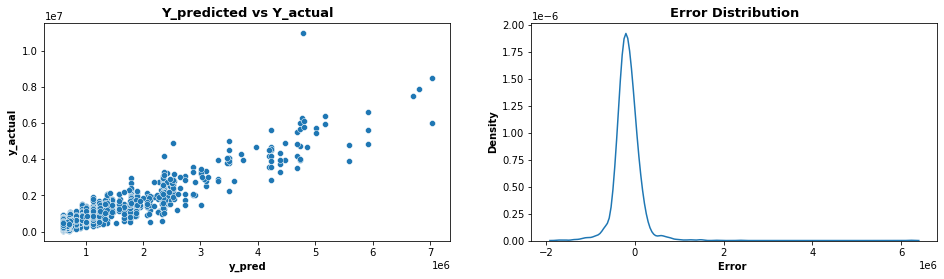

In [181]:
# Plotting the error distribution graphs

model_error_plotting(y_pred_ada)

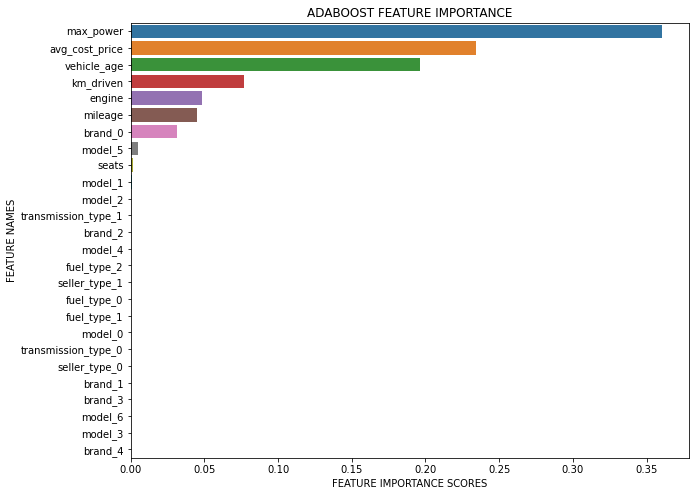

In [182]:
# Plotting feature importance graph
ada.fit(X_train_1, y_train)
plot_feature_importance(ada.feature_importances_,X_train_1.columns,'ADABOOST')

###### 2.2 Gradient Boosting

In [183]:
gbr = GradientBoostingRegressor()
gbr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', gbr)
])

In [184]:
score, error, error2 = do_prediction(gbr_pipeline)

printing(score, error, error2)

Cross validation score: 0.94
Median Absolute Error: 58013.28
R2 score: 0.94


In [185]:
# To create a dataframe containing the performance of each models
model_performance('GradientBoostingRegressor', score, error, error2)

In [186]:
y_pred_gbr = gbr_pipeline.predict(X_test)

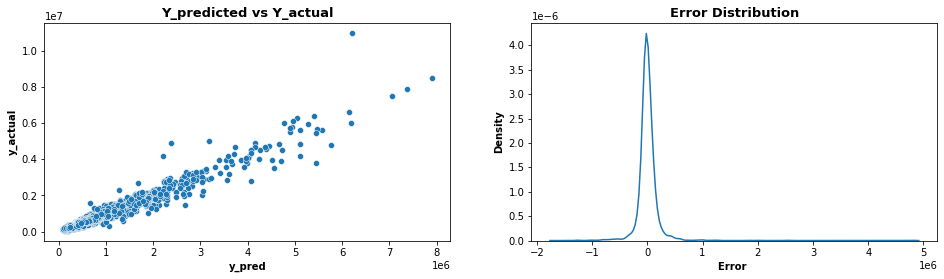

In [187]:
# Plotting the error distribution graphs

model_error_plotting(y_pred_gbr)

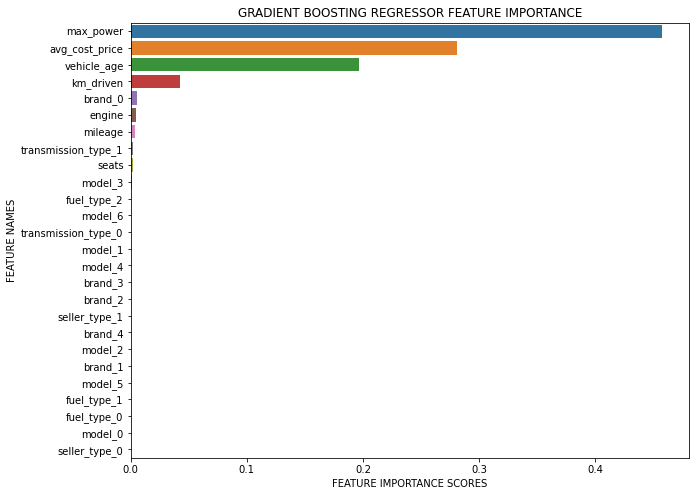

In [188]:
# Plotting feature importance graph
gbr.fit(X_train_1, y_train)
plot_feature_importance(gbr.feature_importances_,X_train_1.columns,'GRADIENT BOOSTING REGRESSOR')

###### 2.3 XGBoost

In [189]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', xgb)
])

In [190]:
score, error, error2 = do_prediction(xgb_pipeline)

printing(score, error, error2)

Cross validation score: 0.95
Median Absolute Error: 48038.59
R2 score: 0.94


In [191]:
# To create a dataframe containing the performance of each models
model_performance('XGBRegressor', score, error, error2)

In [192]:
y_pred_xgb = xgb_pipeline.predict(X_test)

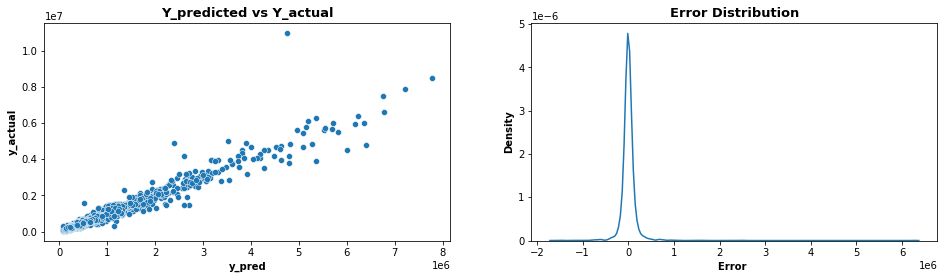

In [193]:
# Plotting the error distribution graphs

model_error_plotting(y_pred_xgb)

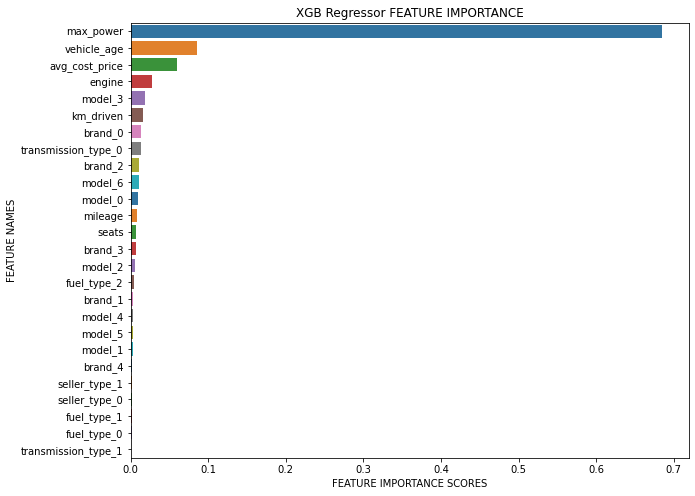

In [194]:
# Plotting feature importance graph
xgb.fit(X_train_1, y_train)
plot_feature_importance(xgb.feature_importances_,X_train_1.columns,'XGB Regressor')

###### 3. Stacking Regressors

In [195]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
svr = SVR()

estimators = [
     ('linear_reg', lr ),
     ('svr', svr),
     ('decision_tree', dtr ),
]

sr = StackingRegressor(
         estimators=estimators,
         final_estimator=RandomForestRegressor())

In [196]:
sr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', sr)
])

In [197]:
score, error, error2 = do_prediction(sr_pipeline)

printing(score, error, error2)

Cross validation score: 0.9
Median Absolute Error: 62850.0
R2 score: 0.91


In [198]:
# To create a dataframe containing the performance of each models
model_performance('StackingRegressor', score, error, error2)

In [199]:
y_pred_stacking = sr_pipeline.predict(X_test)

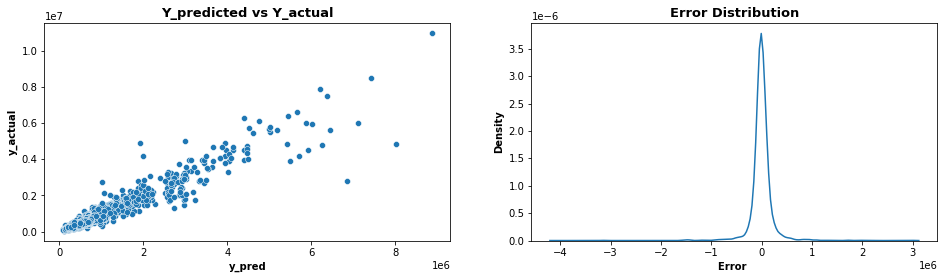

In [200]:
# Plotting the error distribution graphs

model_error_plotting(y_pred_stacking)

###### 4. Voting Regressors

In [201]:
vr = VotingRegressor([('linear_reg', lr ), ('svr', svr), ('decision_tree', dt ), ('random_forest',rf )])

In [202]:
vr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', vr)
])

In [203]:
score, error, error2 = do_prediction(vr_pipeline)

printing(score, error, error2 )

Cross validation score: 0.83
Median Absolute Error: 69221.92
R2 score: 0.83


In [204]:
# To create a dataframe containing the performance of each models
model_performance(' VotingRegressor', score, error, error2)

In [205]:
y_pred_voting = vr_pipeline.predict(X_test)

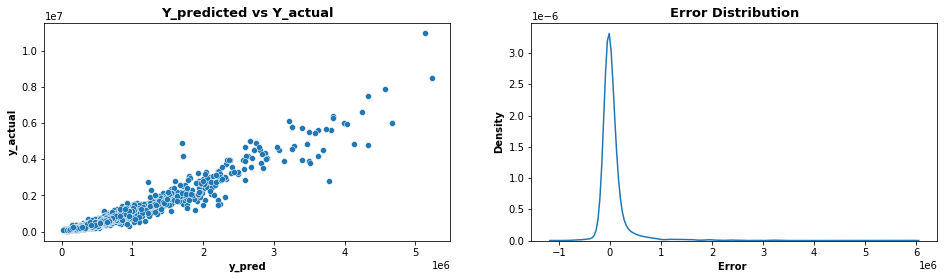

In [206]:
# Plotting the error distribution graphs

model_error_plotting(y_pred_voting)

###### 5. Neural Network Regressor

In [208]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available 1


In [209]:
encoder = ce.BinaryEncoder(cols=['seller_type','fuel_type','transmission_type','brand','model'], return_df=True)
X_train_2 = encoder.fit_transform(X_train) 


In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)

In [211]:
# Binary encoding
encoder= ce.BinaryEncoder(cols=['seller_type','fuel_type','transmission_type','brand','model'], return_df=True)
X_test_2 = encoder.fit_transform(X_test) 

In [212]:
X_test_2 = scaler.transform(X_test_2)

In [213]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train_2.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [214]:
# Compile the network :
history = NN_model.compile(loss='mean_absolute_error', 
                 optimizer='adam',
                 metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               3456      
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 168,321
Trainable params: 168,321
Non-trainable params: 0
_________________________________________________________________


In [215]:
tbCallBack = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                min_delta=0, 
                                patience=0, 
                                verbose=0, 
                                mode='auto', 
                                baseline=None, 
                                restore_best_weights=False)

In [216]:
history = NN_model.fit(
    X_train_2, 
    y_train, 
    epochs=100, 
    batch_size=20,
    validation_split=0.2,
    callbacks=[tbCallBack]
)

Epoch 1/100
490/490 [==============================] - 3s 4ms/step - loss: 313532.1875 - mean_absolute_error: 313532.1875 - val_loss: 161273.0781 - val_mean_absolute_error: 161273.0781
Epoch 2/100
490/490 [==============================] - 2s 4ms/step - loss: 148409.3281 - mean_absolute_error: 148409.3281 - val_loss: 148638.7969 - val_mean_absolute_error: 148638.7969


In [217]:
y_pred = NN_model.predict(X_test_2)

96/96 [==============================] - 0s 1ms/step


In [218]:
nn_r2 = r2_score(y_test, y_pred)
nn_mae = median_absolute_error(y_test, y_pred.reshape(-1, 1))
nn_cvs = float("nan")

In [219]:
print('Median Absolute Error: {}'.format(round(nn_mae,2)))
print('R2 score: {}'.format(round(nn_r2,2)))

Median Absolute Error: 130926.48
R2 score: 0.55


In [220]:
# Converting y_pred and y_test_copy from 2D numpy array to pandas Series so that we can calculate the error
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.squeeze()

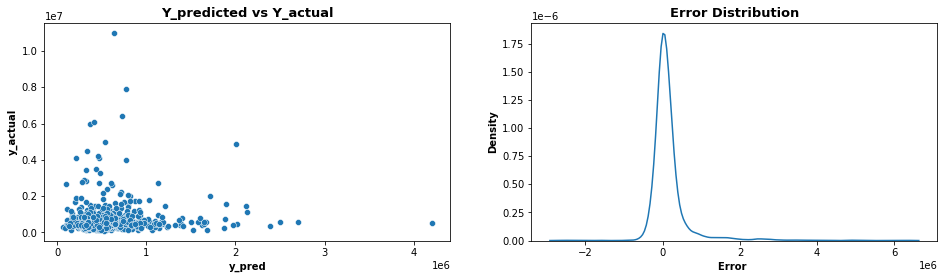

In [221]:
error = (y_test.reset_index()).drop(['index'], axis=1).squeeze() - y_pred
fig = plt.figure(figsize=(16,4))
gs = fig.add_gridspec(1,2)

#Row 1
ax00 = fig.add_subplot(gs[0,0])
ax00_s = sns.scatterplot(y=y_test.squeeze(),x= y_pred)
ax00_s.set_xlabel(xlabel='y_pred', fontsize=10, weight='bold')
ax00_s.set_ylabel(ylabel='y_actual', fontsize=10, weight='bold')
ax00_s.set_title('Y_predicted vs Y_actual', fontsize=13, weight='bold')

ax01 = fig.add_subplot(gs[0,1])
ax01_s = sns.kdeplot(x = error)
ax01_s.set_xlabel(xlabel='Error ', fontsize=10, weight='bold')
ax01_s.set_ylabel(ylabel='Density', fontsize=10, weight='bold')
ax01_s.set_title('Error Distribution', fontsize=13, weight='bold')

plt.show()

In [222]:
# To create a dataframe containing the performance of each models
model_performance('Artificial Neural Network', nn_cvs,nn_mae, nn_r2)

###### 6. Performance Comparison of various models

In [223]:
model_performance_df1 = pd.DataFrame.from_dict(model_performance_df)
model_performance_df2 = model_performance_df1.round(2)

In [224]:
model_performance_df2

,Regressor,CV_Score,Median_Abs_Error,R2_Score
0,LinearRegression,0.70,132149.62,0.72
1,LassoRegression,0.70,132144.00,0.72
2,RidgeRegression,0.70,132128.82,0.72
3,DecisionTree,0.91,56000.00,0.91
4,SupportVectorRegression,-0.07,199597.39,-0.07
5,BaggingRegressor,0.94,49225.00,0.95
6,RandomForestRegressor,0.95,48450.00,0.95
7,ExtraTreesRegressor,0.95,49675.00,0.94
8,AdaBoostRegressor,0.76,202875.84,0.81
9,GradientBoostingRegressor,0.94,58013.28,0.94


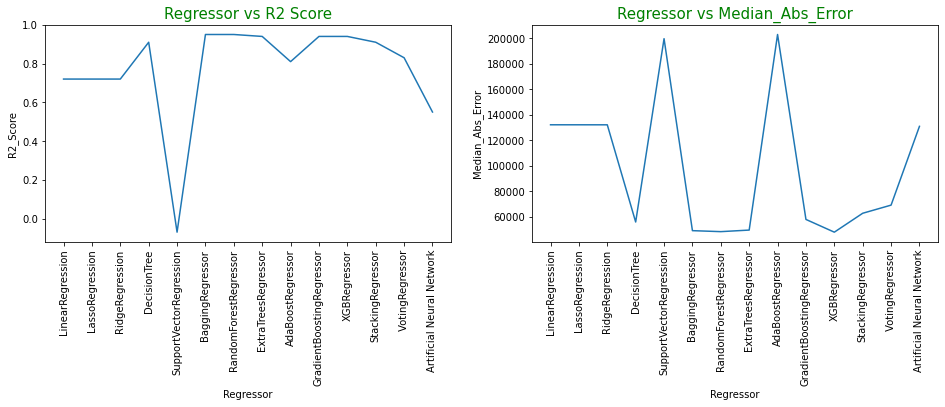

In [225]:
fig = plt.figure(figsize=(16,4))
gs = fig.add_gridspec(1,2)

ax00 = fig.add_subplot(gs[0,0])
ax00_s = sns.lineplot(data=model_performance_df2, x="Regressor", y="R2_Score")
plt.xticks(rotation=90)
plt.title(label="Regressor vs R2 Score",fontsize=15,color="green")

ax01 = fig.add_subplot(gs[0,1])
ax01 = sns.lineplot(data=model_performance_df2, x="Regressor", y="Median_Abs_Error")
plt.xticks(rotation=90)
plt.title(label="Regressor vs Median_Abs_Error",fontsize=15,color="green")
plt.show()

In [ ]:
model_performance_df2.to_csv('model_performance.csv')

###### 7. Saving the best model using pickle

In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rf_pipeline,open('pipe.pkl','wb'))